In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv('/Users/yashpatawari/LLM_VLM_Comparison/Evaluation Datasheet - Individual Score.csv')
df.head()

df2 = pd.read_csv('/Users/yashpatawari/LLM_VLM_Comparison/Evaluation Datasheet - Individual Score with Ground truth.csv')


In [54]:
methods = df['Method']
print(methods)

methods_list = methods.tolist()
print(type(methods_list))

methods_list2 = df2['Method'].tolist()

print(methods_list2)


0             LLM-Zero Shot
1              LLM-One Shot
2              LLM-Two Shot
3             LLM-Four Shot
4                   LLM-RAG
5             LLM-Fine Tune
6    VLM-No Object Detector
7             VLM-Zero Shot
8              VLM-One Shot
9             VLM-Fine Tune
Name: Method, dtype: object
<class 'list'>
['LLM-Zero Shot', 'LLM-One Shot', 'LLM-Two Shot', 'LLM-Four Shot', 'LLM-RAG', 'LLM-Fine Tune', 'VLM-No Object Detector', 'VLM-Zero Shot', 'VLM-One Shot', 'VLM-Fine Tune']


In [50]:
def avg_scores(list1, list2, list3):
    avg_list = []
    for i in range(len(list1)):
        average = (list1[i] + list2[i] + list3[i])/3
        formatted_avg = float(format(average, '.2f'))
        avg_list.append(formatted_avg)
    return avg_list

In [52]:
gpt = df['ChatGPT'].tolist()
gemini = df['Gemini'].tolist()
c4 = df['c4 AI Command R+'].tolist()

print(gpt)
print(gemini)
print(c4)
print("2nd DF")

without_context_avg = avg_scores(gpt, gemini, c4)
print(without_context_avg)


gpt2 = df2['ChatGPT'].tolist()
gemini2 = df2['Gemini'].tolist()
c42 = df2['c4 AI Command R+'].tolist()

print(gpt2)
print(gemini2)
print(c42)

with_context_avg = avg_scores(gpt2, gemini2, c42)
print(with_context_avg)

# print(type(without_context_avg[0]))

[8.3, 8.2, 8.6, 9.0, 8.4, 8.4, 5.6, 8.2, 8.0, 8.0]
[8.1, 8.1, 8.2, 8.2, 9.0, 8.4, 3.8, 7.6, 7.6, 8.8]
[8.2, 8.4, 8.8, 9.0, 9.0, 9.0, 7.4, 8.3, 8.9, 8.8]
2nd DF
[8.2, 8.23, 8.53, 8.73, 8.8, 8.6, 5.6, 8.03, 8.17, 8.53]
[6.2, 6.9, 6.6, 7.8, 8.0, 7.3, 4.0, 6.2, 6.2, 7.0]
[7.2, 7.8, 7.4, 5.0, 9.0, 8.6, 3.6, 7.0, 6.34, 8.1]
[7.2, 7.3, 7.4, 7.2, 9.4, 8.2, 2.2, 7.5, 6.8, 8.3]
[6.87, 7.33, 7.13, 6.67, 8.8, 8.03, 3.27, 6.9, 6.45, 7.8]


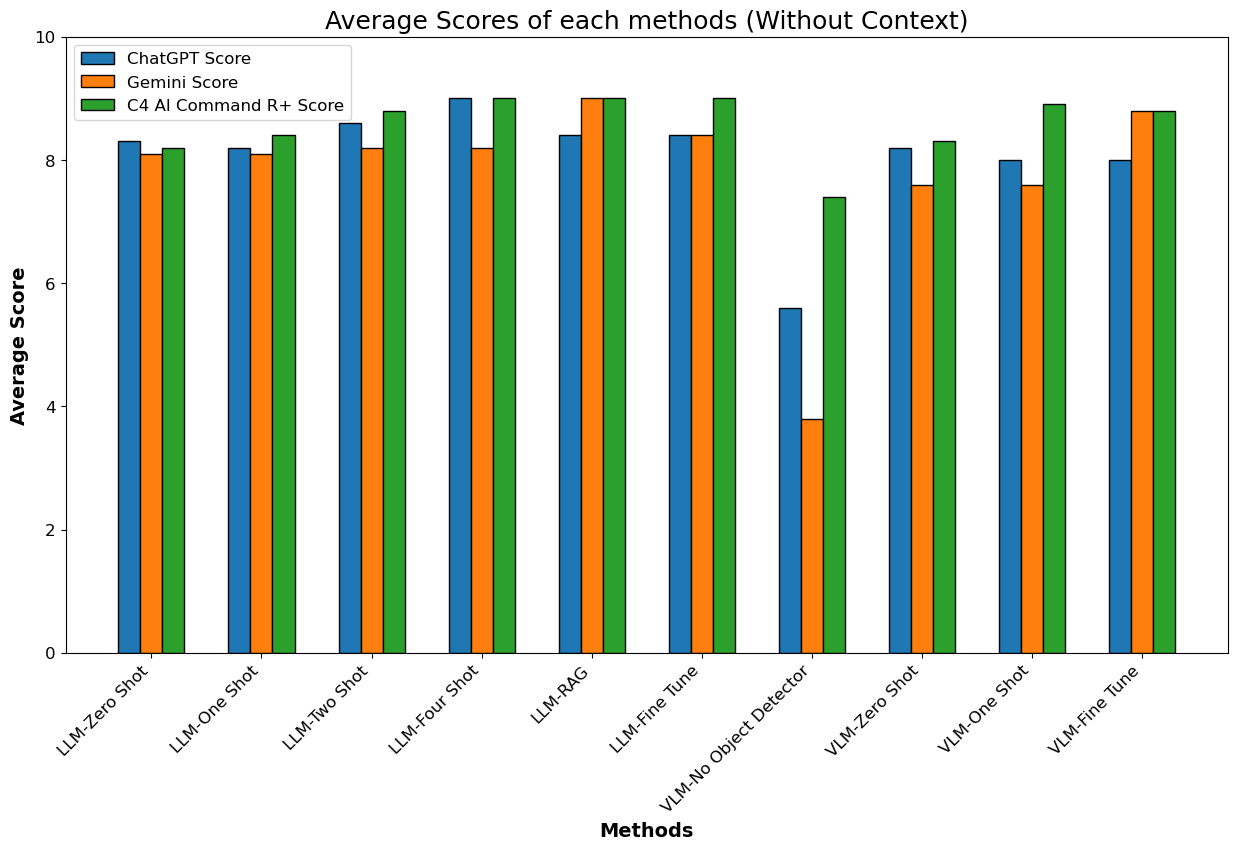

In [38]:
bar_width = 0.2

r1 = np.arange(len(methods_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(15, 8))

plt.bar(r1, gpt, color=colors[0], width=bar_width, edgecolor='black', label='ChatGPT Score')
plt.bar(r2, gemini, color=colors[1], width=bar_width, edgecolor='black', label='Gemini Score')
plt.bar(r3, c4, color=colors[2], width=bar_width, edgecolor='black', label='C4 AI Command R+ Score')

plt.xlabel('Methods', fontweight='bold', fontsize=14)
plt.ylabel('Average Score', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(methods_list))], methods_list, fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0,10)
plt.title('Average Scores of each methods (Without Context)', fontsize=18)

# plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize=12)
plt.show()

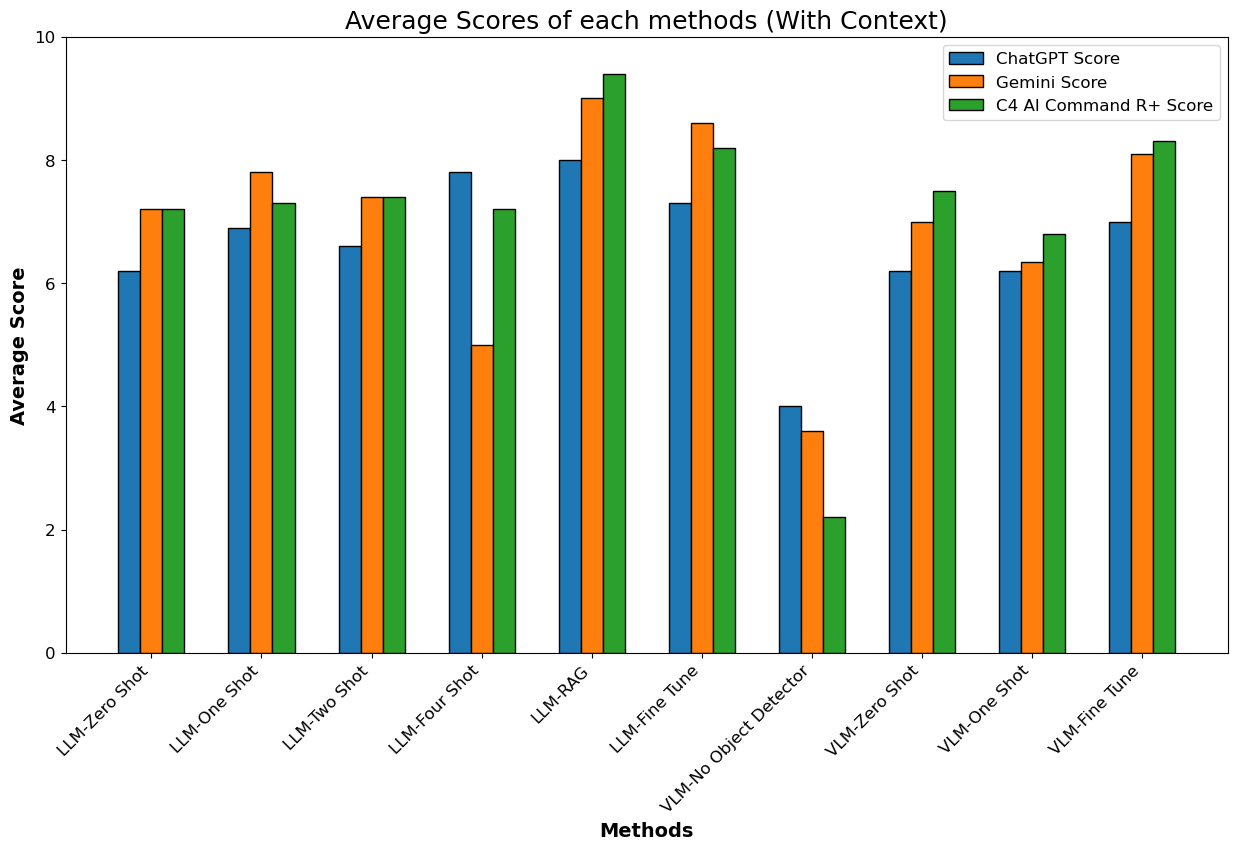

In [42]:
bar_width = 0.2

r1 = np.arange(len(methods_list2))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(15, 8))

plt.bar(r1, gpt2, color=colors[0], width=bar_width, edgecolor='black', label='ChatGPT Score')
plt.bar(r2, gemini2, color=colors[1], width=bar_width, edgecolor='black', label='Gemini Score')
plt.bar(r3, c42, color=colors[2], width=bar_width, edgecolor='black', label='C4 AI Command R+ Score')

plt.xlabel('Methods', fontweight='bold', fontsize=14)
plt.ylabel('Average Score', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(methods_list2))], methods_list2, fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0,10)
plt.title('Average Scores of each methods (With Context)', fontsize=18)

# plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


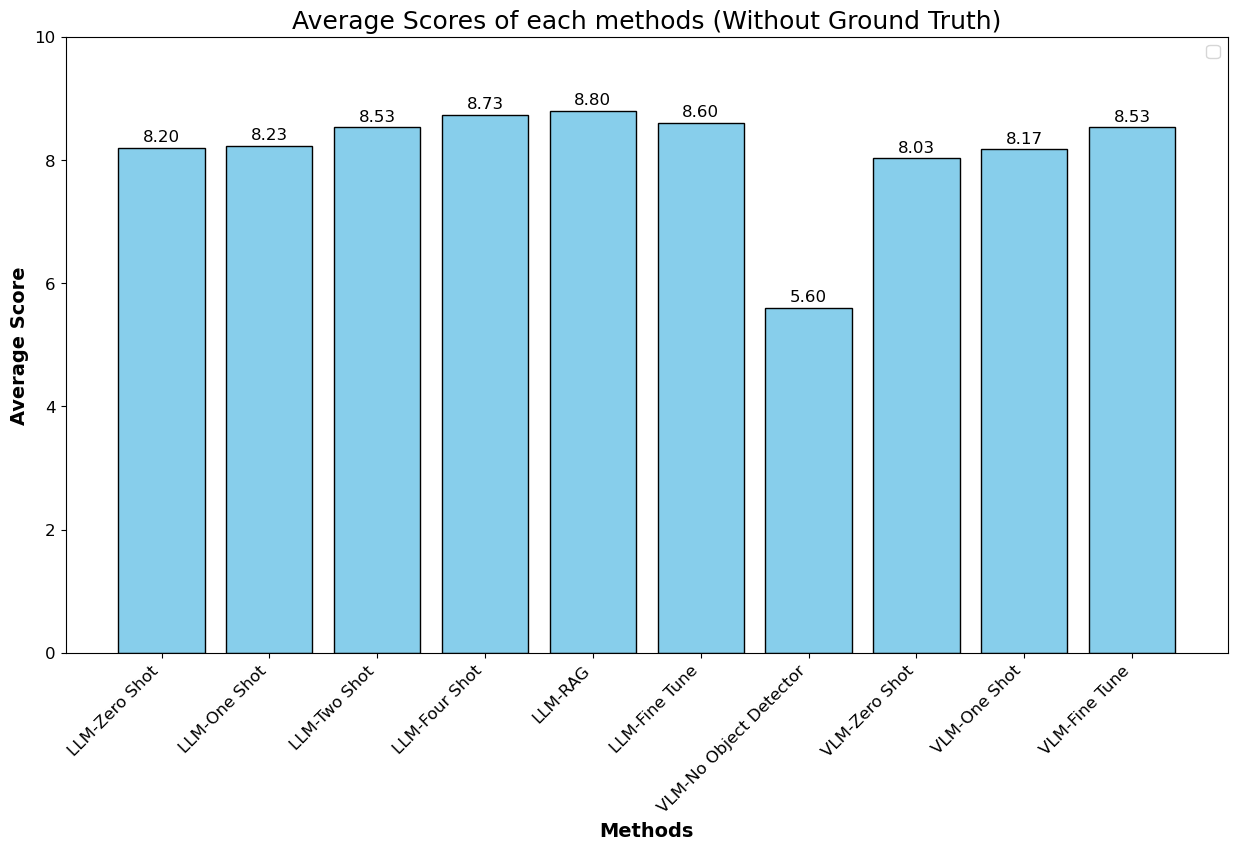

In [68]:
# Combined Bar Graph

r1 = np.arange(len(methods_list2))

plt.figure(figsize=(15, 8))

bars = plt.bar(methods_list2, without_context_avg, edgecolor='black',color = 'skyblue')

plt.xlabel('Methods', fontweight='bold', fontsize=14)
plt.ylabel('Average Score', fontweight='bold', fontsize=14)
# plt.xticks([r + bar_width for r in range(len(methods_list2))], methods_list2, fontsize=12, rotation=45, ha='right')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0,10)
plt.title('Average Scores of each methods (Without Ground Truth)', fontsize=18)

for bar, value in zip(bars, without_context_avg):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
plt.legend(fontsize=12)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


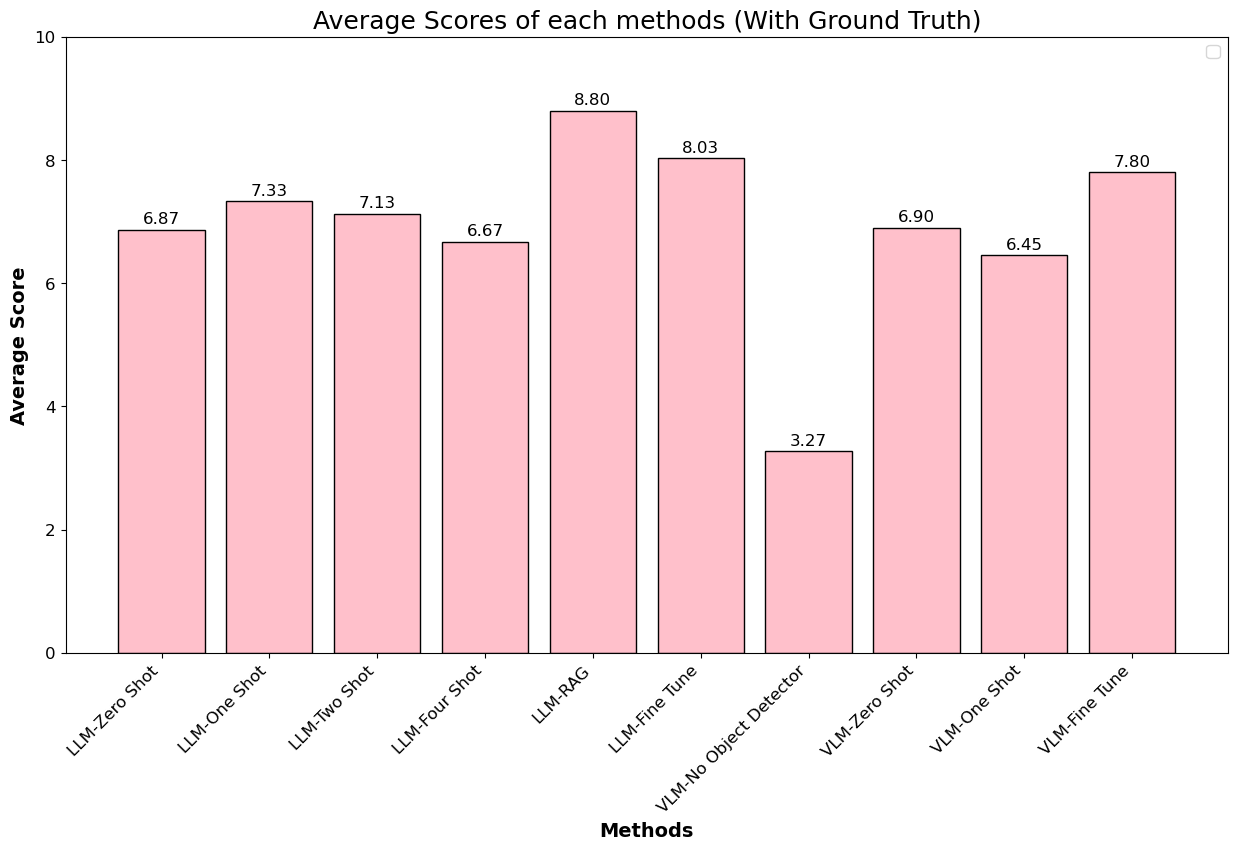

In [70]:
# Combined Bar Graph

r1 = np.arange(len(methods_list2))

plt.figure(figsize=(15, 8))

bars = plt.bar(methods_list2, with_context_avg, edgecolor='black',color = 'pink')

plt.xlabel('Methods', fontweight='bold', fontsize=14)
plt.ylabel('Average Score', fontweight='bold', fontsize=14)
# plt.xticks([r + bar_width for r in range(len(methods_list2))], methods_list2, fontsize=12, rotation=45, ha='right')
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0,10)
plt.title('Average Scores of each methods (With Ground Truth)', fontsize=18)

for bar, value in zip(bars, with_context_avg):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
# plt.tight_layout()
plt.legend(fontsize=12)
plt.show()